***
# <font color=green size=10>CURSO DE ESTATÍSTICA - PARTE 1</font>
***

## Trabalho de Análise Descritiva de um Conjunto de Dados

Utilizando os conhecimentos adquiridos em nosso treinamento realize uma análise descritiva básica de um conjunto de dados retirados da Pesquisa Nacional por Amostra de Domicílios - 2015 do IBGE. 

Vamos construir histogramas, calcular e avaliar medidas de tendência central, medidas separatrizes e de dispersão dos dados.

Siga o roteiro proposto e vá completando as células vazias. Procure pensar em mais informações interessantes que podem ser exploradas em nosso dataset.

# <font color=green>DATASET DO PROJETO</font>
***

### Pesquisa Nacional por Amostra de Domicílios - 2015

A <b>Pesquisa Nacional por Amostra de Domicílios - PNAD</b> investiga anualmente, de forma permanente, características gerais da população, de educação, trabalho, rendimento e habitação e outras, com periodicidade variável, de acordo com as necessidades de informação para o país, como as características sobre migração, fecundidade, nupcialidade, saúde, segurança alimentar, entre outros temas. O levantamento dessas estatísticas constitui, ao longo dos 49 anos de realização da pesquisa, um importante instrumento para formulação, validação e avaliação de políticas orientadas para o desenvolvimento socioeconômico e a melhoria das condições de vida no Brasil.

### Fonte dos Dados

https://ww2.ibge.gov.br/home/estatistica/populacao/trabalhoerendimento/pnad2015/microdados.shtm

### Variáveis utilizadas

> ### Renda
> ***

Rendimento mensal do trabalho principal para pessoas de 10 anos ou mais de idade.

> ### Idade
> ***

Idade do morador na data de referência em anos.

> ### Altura (elaboração própria)
> ***

Altura do morador em metros.

> ### UF
> ***

|Código|Descrição|
|---|---|
|11|Rondônia|
|12|Acre|
|13|Amazonas|
|14|Roraima|
|15|Pará|
|16|Amapá|
|17|Tocantins|
|21|Maranhão|
|22|Piauí|
|23|Ceará|
|24|Rio Grande do Norte|
|25|Paraíba|
|26|Pernambuco|
|27|Alagoas|
|28|Sergipe|
|29|Bahia|
|31|Minas Gerais|
|32|Espírito Santo|
|33|Rio de Janeiro|
|35|São Paulo|
|41|Paraná|
|42|Santa Catarina|
|43|Rio Grande do Sul|
|50|Mato Grosso do Sul|
|51|Mato Grosso|
|52|Goiás|
|53|Distrito Federal|

> ### Sexo	
> ***

|Código|Descrição|
|---|---|
|0|Masculino|
|1|Feminino|

> ### Anos de Estudo
> ***

|Código|Descrição|
|---|---|
|1|Sem instrução e menos de 1 ano|
|2|1 ano|
|3|2 anos|
|4|3 anos|
|5|4 anos|
|6|5 anos|
|7|6 anos|
|8|7 anos|
|9|8 anos|
|10|9 anos|
|11|10 anos|
|12|11 anos|
|13|12 anos|
|14|13 anos|
|15|14 anos|
|16|15 anos ou mais|
|17|Não determinados| 
||Não aplicável|

> ### Cor
> ***

|Código|Descrição|
|---|---|
|0|Indígena|
|2|Branca|
|4|Preta|
|6|Amarela|
|8|Parda|
|9|Sem declaração|

#### <font color='red'>Observação</font>
***
> Os seguintes tratamentos foram realizados nos dados originais:
> 1. Foram eliminados os registros onde a <b>Renda</b> era inválida (999 999 999 999);
> 2. Foram eliminados os registros onde a <b>Renda</b> era missing;
> 3. Foram considerados somente os registros das <b>Pessoas de Referência</b> de cada domicílio (responsável pelo domicílio).

***
***

### Utilize a célula abaixo para importar as biblioteca que precisar para executar as tarefas
#### <font color='red'>Sugestões: pandas, numpy, seaborn</font>

In [115]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(rc={'figure.figsize':(12, 4)})

### Importe o dataset e armazene o conteúdo em uma DataFrame

In [116]:
df = pd.read_csv('Dados.csv')

### Visualize o conteúdo do DataFrame

In [117]:
df.head(10)

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631
5,11,1,34,8,12,790,1.637906
6,11,0,57,8,12,3150,1.570078
7,11,1,60,8,12,1700,1.608495
8,11,1,50,4,14,1800,1.780329
9,11,0,26,8,12,1150,1.793203


### Para avaliarmos o comportamento da variável RENDA vamos construir uma tabela de frequências considerando as seguintes classes em salários mínimos (SM)
#### <font color='blue'>Descreva os pontos mais relevantes que você observa na tabela e no gráfico.</font>

Classes de renda:

<b>A</b> ► Acima de 25 SM

<b>B</b> ► De 15 a 25 SM

<b>C</b> ► De 5 a 15 SM

<b>D</b> ► De 2 a 5 SM

<b>E</b> ► Até 2 SM

Para construir as classes de renda considere que o salário mínimo na época da pesquisa era de <b>R$ 788,00</b>.

#### Siga os passos abaixo:

### 1º Definir os intevalos das classes em reais (R$)

In [118]:
sm = 788
classes = [0, 2*sm, 5*sm, 15*sm, 25*sm, df['Renda'].max()]
classes

[0, 1576, 3940, 11820, 19700, 200000]

### 2º Definir os labels das classes

In [119]:
labels = ['0 até 2 SM', 'De 2 SM até 5 SM', 'De 5 SM até 15 SM', 'De 15 SM até 25 SM', 'Acima de 25 SM']
labels

['0 até 2 SM',
 'De 2 SM até 5 SM',
 'De 5 SM até 15 SM',
 'De 15 SM até 25 SM',
 'Acima de 25 SM']

### 3º Construir a coluna de frequências

In [120]:
frequencia = pd.cut(df['Renda'], bins=classes, labels=labels, include_lowest=True).value_counts()
frequencia

0 até 2 SM            49755
De 2 SM até 5 SM      18602
De 5 SM até 15 SM      7241
De 15 SM até 25 SM      822
Acima de 25 SM          420
Name: Renda, dtype: int64

### 4º Construir a coluna de percentuais

In [121]:
percentual = pd.cut(df['Renda'], bins=classes, labels=labels, include_lowest=True).value_counts(normalize=True)*100
percentual

0 até 2 SM            64.751432
De 2 SM até 5 SM      24.208745
De 5 SM até 15 SM      9.423477
De 15 SM até 25 SM     1.069755
Acima de 25 SM         0.546590
Name: Renda, dtype: float64

### 5º Juntar as colunas de frequência e percentuais e ordenar as linhas de acordo com os labels das classes

In [122]:
dist_frequencia_faixa_salarios = pd.DataFrame({'Frequencia': frequencia, 'Porcentagem (%)': percentual})
dist_frequencia_faixa_salarios

,Frequencia,Porcentagem (%)
0 até 2 SM,49755,64.751432
De 2 SM até 5 SM,18602,24.208745
De 5 SM até 15 SM,7241,9.423477
De 15 SM até 25 SM,822,1.069755
Acima de 25 SM,420,0.546590


### Construa um gráfico de barras para visualizar as informações da tabela de frequências acima

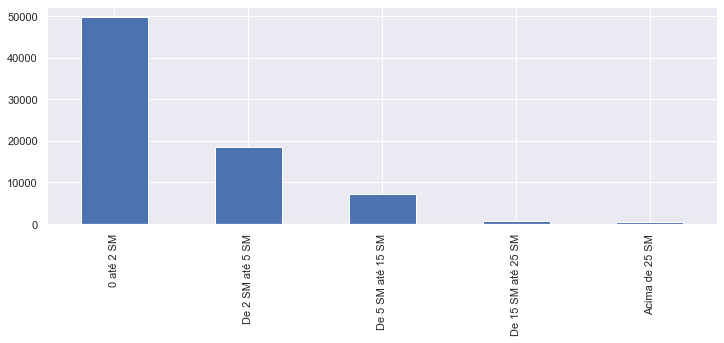

In [123]:
ax = dist_frequencia_faixa_salarios['Frequencia'].plot.bar()

> ### Conclusões

Analisando os dados obtidos é possível perceber a diferença de salarário na amostra selecionada, mais de 50% das pessoas recebem até 2 SM. Quanto maior a faixa salarial menor é a quantidade de pessoas que se encontram nela.
É possível perceber que há uma desiguladade salarial na amostra selecionada.

### Crie um histograma para as variáveis QUANTITATIVAS de nosso dataset
#### <font color='blue'>Descreva os pontos mais relevantes que você observa nos gráficos (assimetrias e seus tipos, possíveis causas para determinados comportamentos etc.)</font>

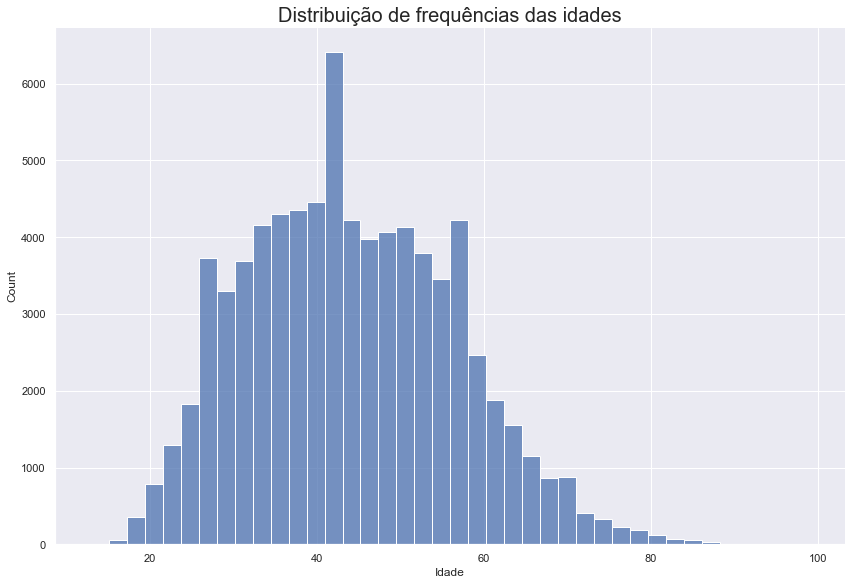

In [128]:
ax = sns.displot(x='Idade', data=df, bins=40, kind='hist', height=8, aspect=1.5)
plt.title('Distribuição de frequências das idades', fontdict={'fontsize': 20})
plt.show()

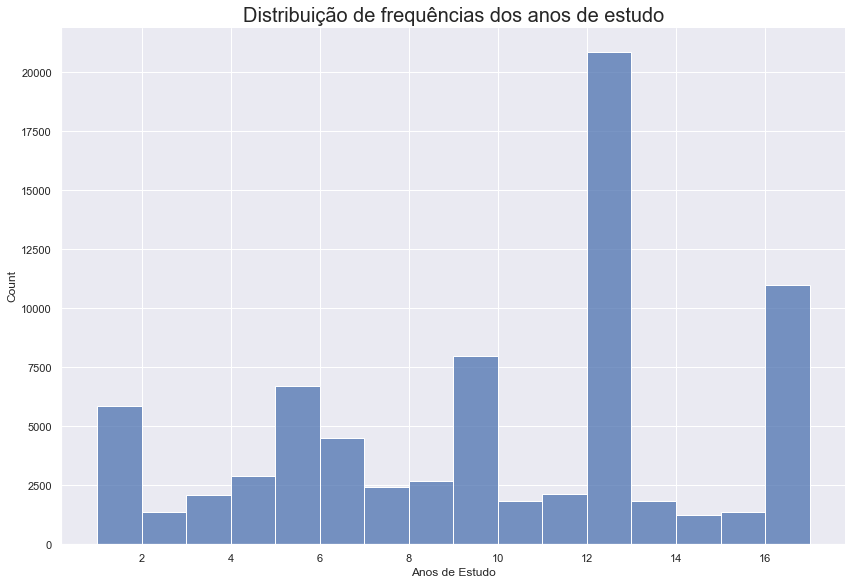

In [129]:
ax = sns.displot(x='Anos de Estudo', data=df, bins=16, kind='hist', height=8, aspect=1.5)
plt.title('Distribuição de frequências dos anos de estudo', fontdict={'fontsize': 20})
plt.show()

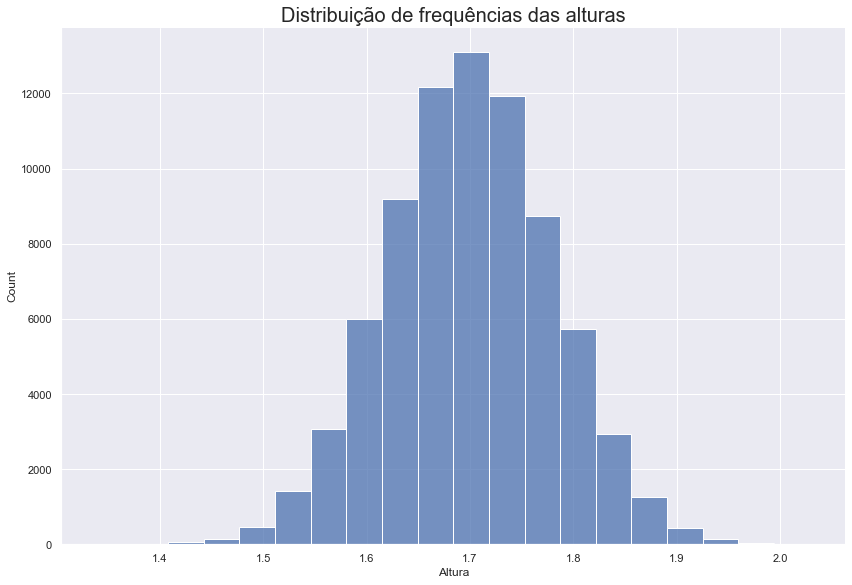

In [130]:
ax = sns.displot(x='Altura', data=df, bins=20, kind='hist', height=8, aspect=1.5)
plt.title('Distribuição de frequências das alturas', fontdict={'fontsize': 20})
plt.show()

> ### Conclusões

É possível observar que o histograma da altura por ser uma variada criada a partir de uma distribuição normal, seus dados são bastante uniformes e possui uma média, moda e mediana praticamente iguais.
O histograma da renda é possível ver que mesmo removendo os valores mais extremos, ainda sim possui uma grande assimetria a direita devido a desigualdades da amostra analisada. De acordo com as medidas de tendencia central, a ordem fica moda < mediana < media
O histograma dos anos de estudo mostram como os dados possui uma assimetria a esquerda e que os dados possui leves picos depois dos anos de formações completos (ensino médio, fundamental, superior e etc)

### Para a variável RENDA, construa um histograma somente com as informações das pessoas com rendimento até R$ 20.000,00

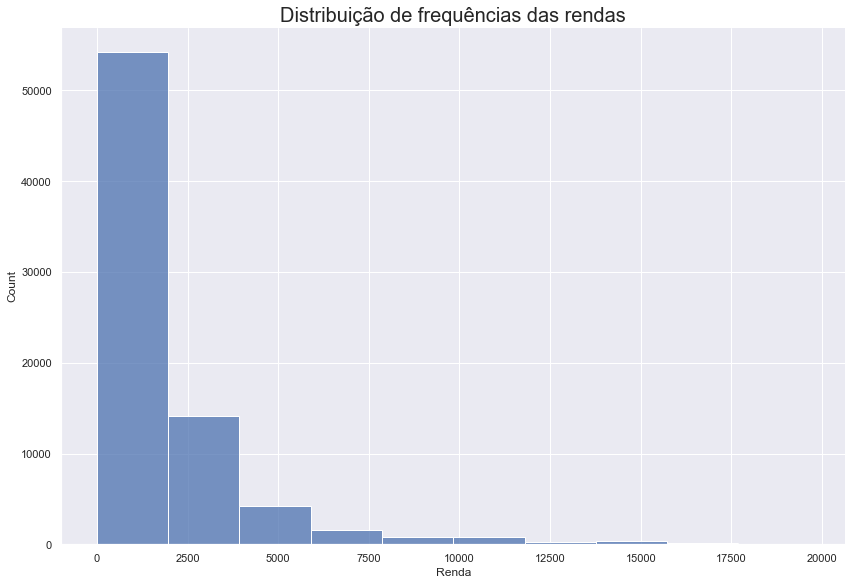

In [131]:
ax = sns.displot(x='Renda', data=df.query('Renda < 20000'), bins=10, kind='hist', height=8, aspect=1.5)
plt.title('Distribuição de frequências das rendas', fontdict={'fontsize': 20})
plt.show()

### Construa uma tabela de frequências e uma com os percentuais do cruzando das variáveis SEXO e COR
#### <font color='blue'>Avalie o resultado da tabela e escreva suas principais conclusões</font>
#### <font color='red'>Utilize os dicionários abaixo para renomear as linha e colunas das tabelas de frequências e dos gráficos em nosso projeto</font>

In [14]:
sexo = {
    0: 'Masculino', 
    1: 'Feminino'
}
cor = {
    0: 'Indígena', 
    2: 'Branca', 
    4: 'Preta', 
    6: 'Amarela', 
    8: 'Parda', 
    9: 'Sem declaração'
}
anos_de_estudo = {
    1: 'Sem instrução e menos de 1 ano', 
    2: '1 ano', 
    3: '2 anos', 
    4: '3 anos', 
    5: '4 anos', 
    6: '5 anos', 
    7: '6 anos', 
    8: '7 anos', 
    9: '8 anos', 
    10: '9 anos', 
    11: '10 anos', 
    12: '11 anos', 
    13: '12 anos', 
    14: '13 anos', 
    15: '14 anos', 
    16: '15 anos ou mais', 
    17: 'Não determinados'
}
uf = {
    11: 'Rondônia', 
    12: 'Acre', 
    13: 'Amazonas', 
    14: 'Roraima', 
    15: 'Pará', 
    16: 'Amapá', 
    17: 'Tocantins', 
    21: 'Maranhão', 
    22: 'Piauí', 
    23: 'Ceará', 
    24: 'Rio Grande do Norte', 
    25: 'Paraíba', 
    26: 'Pernambuco', 
    27: 'Alagoas', 
    28: 'Sergipe', 
    29: 'Bahia', 
    31: 'Minas Gerais', 
    32: 'Espírito Santo', 
    33: 'Rio de Janeiro', 
    35: 'São Paulo', 
    41: 'Paraná', 
    42: 'Santa Catarina', 
    43: 'Rio Grande do Sul', 
    50: 'Mato Grosso do Sul', 
    51: 'Mato Grosso', 
    52: 'Goiás', 
    53: 'Distrito Federal'
}

In [15]:
frequencia = pd.crosstab(df['Sexo'], df['Cor'])
frequencia.rename(index=sexo, inplace=True)
frequencia.rename(columns=cor, inplace=True)
frequencia

Cor,Indígena,Branca,Preta,Amarela,Parda
Sexo,,,,,
Masculino,256,22194,5502,235,25063
Feminino,101,9621,2889,117,10862


In [16]:
percentual = pd.crosstab(df['Sexo'], df['Cor'], normalize=True) * 100
percentual.rename(index=sexo, inplace=True)
percentual.rename(columns=cor, inplace=True)
percentual

Cor,Indígena,Branca,Preta,Amarela,Parda
Sexo,,,,,
Masculino,0.333160,28.883394,7.160333,0.305830,32.617126
Feminino,0.131442,12.520822,3.759761,0.152264,14.135867


> ### Conclusões

Como a amostra selecionada foi apenas do chefe do domicilio, a maioria é do sexo masculino. Como a cor da pele é seleciona pelo entrevistado, a maior parte das pessoas se consideram pardos em seguida brancos, pretos, amarelos e por fim indigenas.

## Realize, para a variável RENDA, uma análise descritiva com as ferramentas que aprendemos em nosso treinamento

### Obtenha a média aritimética

In [17]:
df['Renda'].mean()

2000.3831988547631

### Obtenha a mediana

In [18]:
df['Renda'].median()

1200.0

### Obtenha a moda

In [19]:
df['Renda'].mode()[0]

788

### Obtenha o desvio médio absoluto

In [20]:
df['Renda'].mad()

1526.4951371644931

### Obtenha a variância

In [21]:
df['Renda'].var()

11044906.00622118

### Obtenha o desvio-padrão

In [22]:
df['Renda'].std()

3323.3877303470294

### Obtenha a média, mediana e valor máximo da variável RENDA segundo SEXO e COR
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font color='red'>O parâmento <i>aggfunc</i> da função <i>crosstab()</i> pode receber uma lista de funções. Exemplo: <i>aggfunc = {'mean', 'median', 'max'}</i></font>

In [162]:
cross = pd.crosstab(df['Cor'], df['Sexo'], values=df['Renda'], aggfunc = {'mean', 'median', 'max'})
cross.rename(index=cor, inplace=True)
cross.rename(columns=sexo, inplace=True)
cross

max                   mean                 median         
Sexo     Masculino  Feminino    Masculino     Feminino Masculino Feminino
Cor                                                                      
Indígena   10000.0  120000.0  1081.710938  2464.386139     797.5    788.0
Branca    200000.0  100000.0  2925.744435  2109.866750    1700.0   1200.0
Preta      50000.0   23000.0  1603.861687  1134.596400    1200.0    800.0
Amarela    50000.0   20000.0  4758.251064  3027.341880    2800.0   1500.0
Parda     100000.0   30000.0  1659.577425  1176.758516    1200.0    800.0

> ### Conclusões

A amostragem da população amarela por ser muito pequena é dificil analisar as medidas de analise central. Entre os indigenas possui uma grande desigualdade. A média da população branca e amarela são muito grande e da população preta e parda são menores.

### Obtenha as medidas de dispersão da variável RENDA segundo SEXO e COR
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font color='red'>O parâmento <i>aggfunc</i> da função <i>crosstab()</i> pode receber uma lista de funções. Exemplo: <i>aggfunc = {'mad', 'var', 'std'}</i></font>

In [163]:
cross = pd.crosstab(df['Cor'], df['Sexo'], values=df['Renda'], aggfunc = {'mad', 'var', 'std'})
cross.rename(index=cor, inplace=True)
cross.rename(columns=sexo, inplace=True)
cross

mad                       std                         var  \
Sexo        Masculino     Feminino    Masculino      Feminino     Masculino   
Cor                                                                           
Indígena   798.910889  3007.892952  1204.093490  11957.498292  1.449841e+06   
Branca    2261.012346  1670.967106  4750.791872   3251.013154  2.257002e+07   
Preta      975.602482   705.453357  1936.309271   1349.799809  3.749294e+06   
Amarela   3709.597211  2549.146322  5740.824820   3731.173660  3.295707e+07   
Parda     1125.827704   811.580946  2312.087184   1596.233048  5.345747e+06   

                        
Sexo          Feminino  
Cor                     
Indígena  1.429818e+08  
Branca    1.056909e+07  
Preta     1.821960e+06  
Amarela   1.392166e+07  
Parda     2.547960e+06

> ### Conclusões

O desvio padrão, a variancia e desvio médio absoluto são proporcionais. O maior desvio padrão pertence aos indigenas do sexo feminino e o menor dos indigenas do sexo masculino. Com exceção dos indigenas, o desvio padrão do sexo masculino é maior do que do sexo feminino.

### Construa um box plot da variável RENDA segundo SEXO e COR
#### <font color='blue'>É possível verificar algum comportamento diferenciado no rendimento entre os grupos de pessoas analisados? Avalie o gráfico e destaque os pontos mais importantes.</font>
#### <font color='red'>1º - Utilize somente as informações de pessoas com renda abaixo de R$ 10.000</font>
#### <font color='red'>2º - Para incluir uma terceira variável na construção de um boxplot utilize o parâmetro <i>hue</i> e indique a variável que quer incluir na subdivisão.</font>
#### Mais informações: https://seaborn.pydata.org/generated/seaborn.boxplot.html

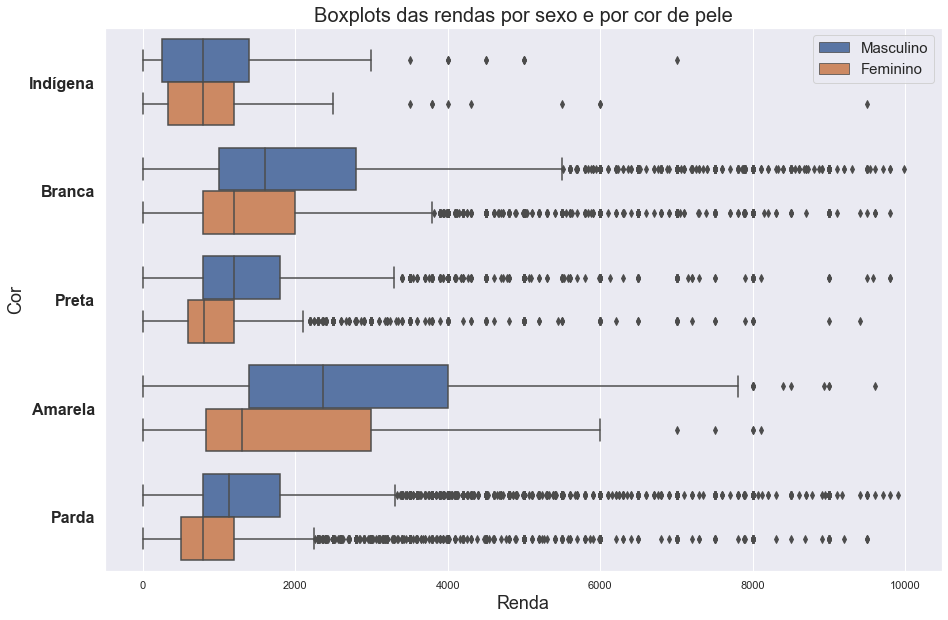

In [216]:
plt.figure(figsize=(15,10))
ax = sns.boxplot(x='Renda', y='Cor', data=df.query('Renda < 10000'), hue='Sexo', orient='h')
handles, _ = ax.get_legend_handles_labels()
ax.legend(handles, ['Masculino', 'Feminino'], fontsize=15)
ax.set_xlabel('Renda', fontsize=18)
ax.set_ylabel('Cor', fontsize=18)
ax.set_yticklabels(list(cor.values())[:5], fontsize=16, fontweight='bold')
plt.title('Boxplots das rendas por sexo e por cor de pele', fontdict={'fontsize': 20})
plt.show()

> ### Conclusões

Escreva suas conclusões aqui...

# <font color="red">DESAFIO<font>
### Qual percentual de pessoas de nosso <i>dataset</i> ganham um salário mínimo (R$ 788,00) ou menos?
#### <font color='red'>Utilize a função <i>percentileofscore()</i> do <i>scipy</i> para realizar estas análises.</font>
#### Mais informações: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.percentileofscore.html


In [217]:
from scipy import stats

stats.percentileofscore(df['Renda'], 788, kind='weak')

28.86777719937533

### Qual o valor máximo ganho por 99% das pessoas de nosso <i>dataset</i>?
#### <font color='red'>Utilize o método <i>quantile()</i> do <i>pandas</i> para realizar estas análises.</font>

In [222]:
df['Renda'].quantile(0.99)

15000.0

### Obtenha a média, mediana, valor máximo e desvio-padrão da variável RENDA segundo ANOS DE ESTUDO e SEXO
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font color='red'>O parâmento <i>aggfunc</i> da função <i>crosstab()</i> pode receber uma lista de funções. Exemplo: <i>aggfunc = ['mean', 'median', 'max', 'std']</i></font>

In [223]:
cross = pd.crosstab(df['Anos de Estudo'], df['Sexo'], values=df['Renda'], aggfunc={'mean', 'median', 'max', 'std', 'count'}).round(2)
cross.rename(columns=sexo, inplace=True)
cross

count                max                mean           \
Sexo           Masculino Feminino Masculino  Feminino Masculino Feminino   
Anos de Estudo                                                             
1                 4476.0   1373.0   30000.0   10000.0    799.49   516.20   
2                 1081.0    307.0   30000.0    2000.0    895.63   492.77   
3                 1637.0    464.0   40000.0    4000.0    931.18   529.91   
4                 2227.0    664.0   80000.0    3500.0   1109.20   546.85   
5                 5020.0   1709.0   50000.0   10000.0   1302.33   704.28   
6                 3247.0   1252.0   35000.0    8000.0   1338.65   781.39   
7                 1790.0    655.0   25000.0    6000.0   1448.88   833.73   
8                 1942.0    747.0   40000.0    9000.0   1465.50   830.75   
9                 5700.0   2280.0   30000.0   18000.0   1639.40   933.62   
10                1287.0    553.0   60000.0   20000.0   1508.04   868.02   
11                1499.0    619.0   45000.0    6000.0   1731.27   925.92   
12               13933.0   6915.0  200000.0  100000.0   2117.06  1286.79   
13                1173.0    663.0   30000.0  120000.0   2470.33  1682.31   
14                 827.0    426.0   25000.0   20000.0   3195.10  1911.73   
15                 819.0    569.0   50000.0   20000.0   3706.62  2226.46   
16                6487.0   4308.0  200000.0  100000.0   6134.28  3899.51   
17                 105.0     86.0    7000.0    3000.0   1295.76   798.17   

                  median                std           
Sexo           Masculino Feminino Masculino Feminino  
Anos de Estudo                                        
1                  700.0    390.0   1023.90   639.31  
2                  788.0    400.0   1331.95   425.29  
3                  788.0    450.0   1435.17   498.23  
4                  800.0    500.0   2143.80   424.12  
5                 1000.0    788.0   1419.82   629.55  
6                 1045.0    788.0   1484.65   635.78  
7                 1200.0    788.0   1476.63   574.55  
8                 1200.0    788.0   1419.71   602.04  
9                 1300.0    800.0   1515.58   896.78  
10                1200.0    788.0   2137.66   973.22  
11                1218.0    800.0   2078.61   620.61  
12                1500.0   1000.0   2676.54  1819.04  
13                1800.0   1200.0   2268.08  4851.83  
14                2400.0   1300.0   2797.12  2053.79  
15                2500.0   1600.0   3987.21  2064.08  
16                4000.0   2800.0   7447.61  4212.77  
17                1200.0    788.0    979.65   459.99

### Construa um box plot da variável RENDA segundo ANOS DE ESTUDO e SEXO
#### <font color='blue'>É possível verificar algum comportamento diferenciado no rendimento entre os grupos de pessoas analisados? Avalie o gráfico e destaque os pontos mais importantes.</font>
#### <font color='red'>1º - Utilize somente as informações de pessoas com renda abaixo de R$ 10.000</font>
#### <font color='red'>2º - Utilize a variável IDADE para identificar se a desigualdade se verifica para pessoas de mesma idade. Exemplo: <i>data=dados.query('Renda < 10000 and Idade == 40')</i> ou <i>data=dados.query('Renda < 10000 and Idade == 50')</i></font>
#### <font color='red'>3º - Para incluir uma terceira variável na construção de um boxplot utilize o parâmetro <i>hue</i> e indique a variável que quer incluir na subdivisão.</font>
#### Mais informações: https://seaborn.pydata.org/generated/seaborn.boxplot.html

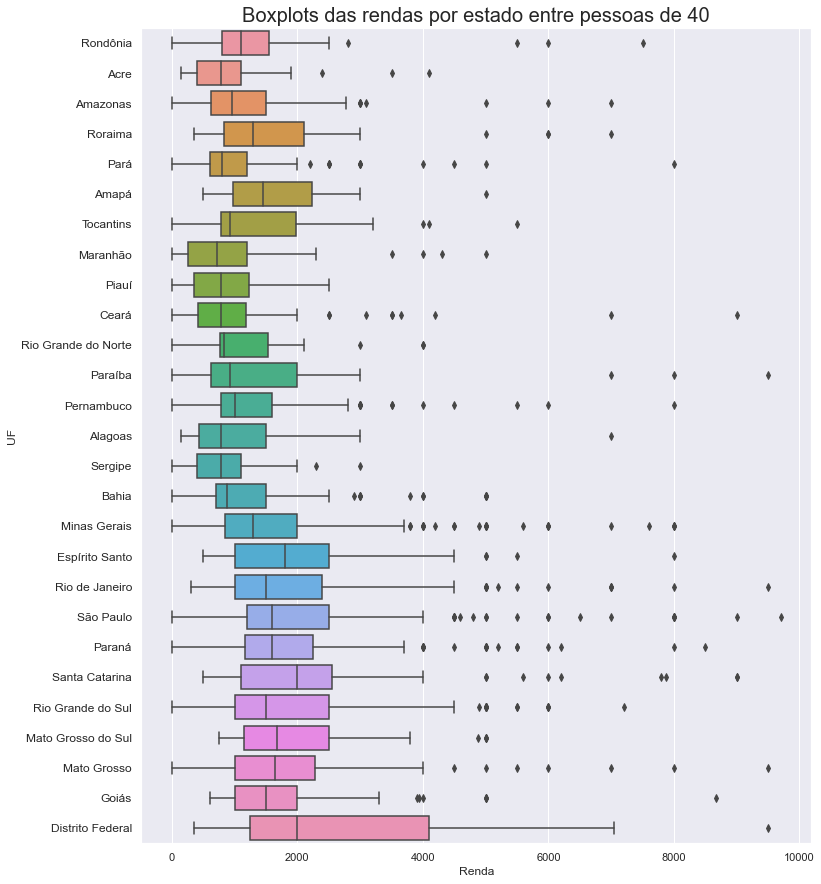

In [228]:
plt.figure(figsize=(12,15))
sns.boxplot(x='Renda', y='UF', data=df.query('(Renda<10000) and (Idade == 40)'), orient='h')
plt.title('Boxplots das rendas por estado entre pessoas de 40', fontdict={'fontsize': 20})
plt.yticks(range(len(uf)), uf.values(), size=12)
plt.show()

> ### Conclusões

Escreva suas conclusões aqui...

### Obtenha a média, mediana, valor máximo e desvio-padrão da variável RENDA segundo as UNIDADES DA FEDERAÇÃO
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font color='red'>Utilize o método <i>groupby()</i> do <i>pandas</i> juntamente com o método <i>agg()</i> para contruir a tabulação. O método <i>agg()</i> pode receber um dicionário especificando qual coluna do DataFrame deve ser utilizada e qual lista de funções estatísticas queremos obter, por exemplo: <i>dados.groupby(['UF']).agg({'Renda': ['mean', 'median', 'max', 'std']})</i></font>

In [87]:
df1 = df.groupby('UF').agg({'Renda': ['mean', 'median', 'max', 'std']})
df1.rename(index=uf)

Renda                            
                            mean median     max          std
UF                                                          
Rondônia             1789.761223   1200   50000  2406.161161
Acre                 1506.091782    900   30000  2276.233415
Amazonas             1445.130100    900   22000  1757.935591
Roraima              1783.588889   1000   20000  2079.659238
Pará                 1399.076871    850   50000  2053.779555
Amapá                1861.353516   1200   15580  2020.688632
Tocantins            1771.094946   1000   60000  2934.590741
Maranhão             1019.432009    700   30000  1887.816905
Piauí                1074.550784    750   40000  2373.355726
Ceará                1255.403692    789   25000  1821.963536
Rio Grande do Norte  1344.721480    800   15500  1651.805500
Paraíba              1293.370487    788   30000  1950.272431
Pernambuco           1527.079319    900   50000  2389.622497
Alagoas              1144.552602    788   11000  1237.856197
Sergipe              1109.111111    788   16000  1478.997878
Bahia                1429.645094    800  200000  3507.917248
Minas Gerais         2056.432084   1200  100000  3584.721547
Espírito Santo       2026.383852   1274  100000  3513.846868
Rio de Janeiro       2496.403168   1400  200000  5214.583518
São Paulo            2638.104986   1600   80000  3503.777366
Paraná               2493.870753   1500  200000  4302.937995
Santa Catarina       2470.854945   1800   80000  3137.651112
Rio Grande do Sul    2315.158336   1500   35000  2913.335783
Mato Grosso do Sul   2262.604167   1500   42000  3031.419122
Mato Grosso          2130.652778   1500   35000  2542.630178
Goiás                1994.580794   1500   30000  2221.933065
Distrito Federal     4241.954722   2000  100000  5550.463338

### Construa um box plot da variável RENDA segundo as UNIDADES DA FEDERAÇÃO
#### <font color='blue'>É possível verificar algum comportamento diferenciado no rendimento entre os grupos analisados? Avalie o gráfico e destaque os pontos mais importantes.</font>
#### <font color='red'>1º - Utilize somente as informações de pessoas com renda abaixo de R$ 10.000</font>

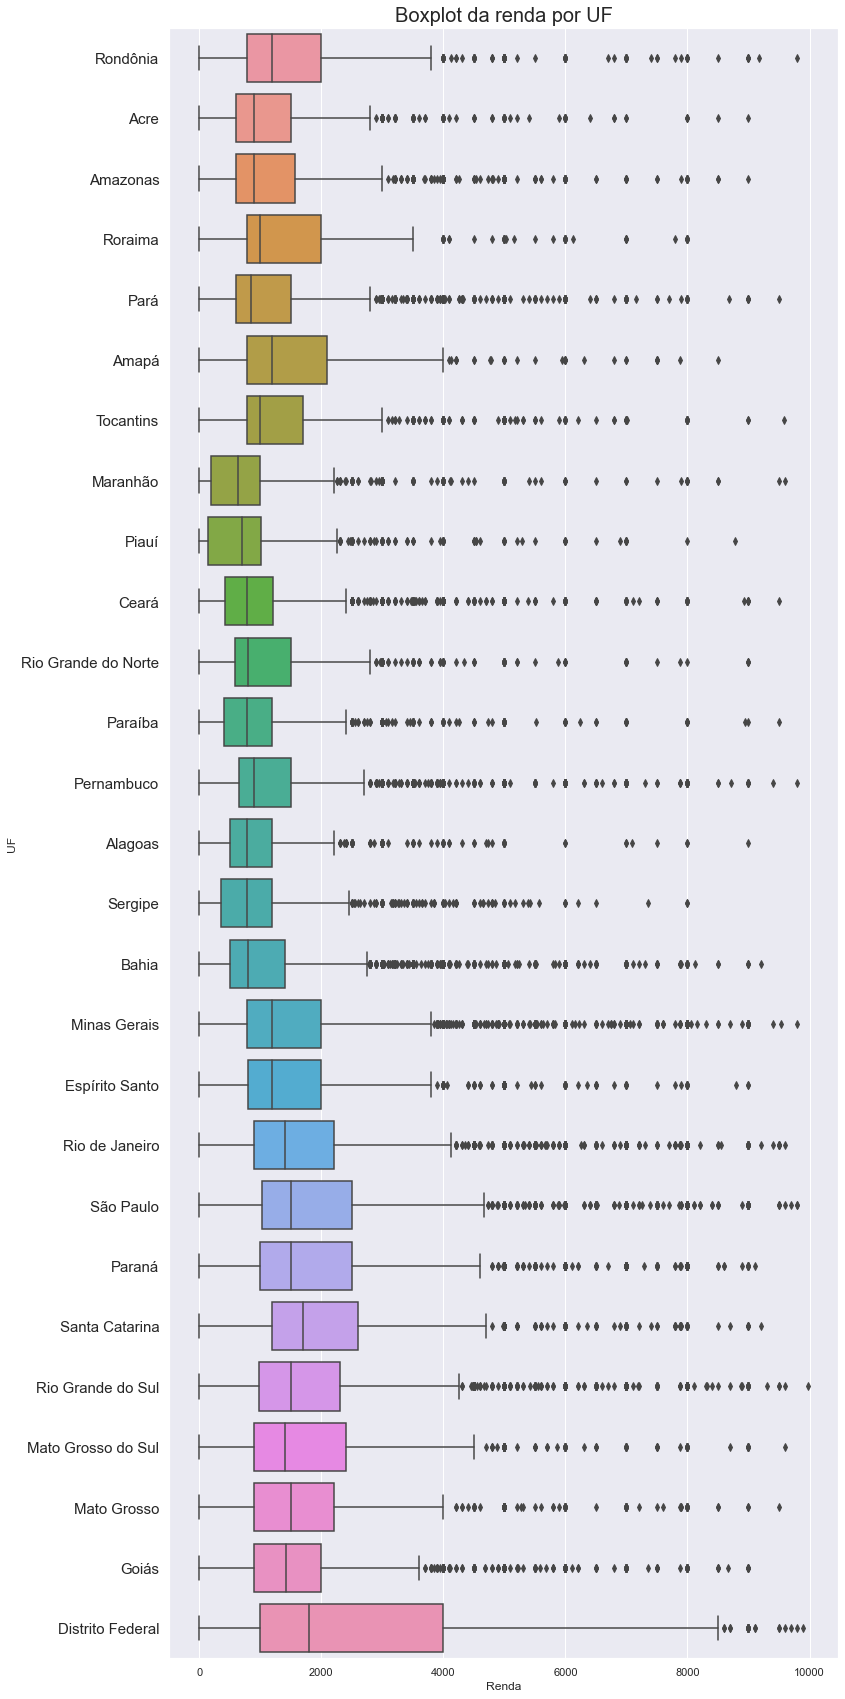

In [175]:
plt.figure(figsize=(12,30))
sns.boxplot(x='Renda', y='UF', data=df.query('Renda < 10000'), orient='h')
plt.yticks(range(len(uf)), uf.values(), size=15)
plt.title('Boxplot da renda por UF', fontdict={'fontsize': 20})
plt.show()

> ### Conclusões

Escreva suas conclusões aqui...